# Process Text

In [66]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.casual import TweetTokenizer
import re
from collections import Counter
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peiyuns/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/peiyuns/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer(preserve_case=False)

In [55]:
def handle_hashtag(hashtag):
    i = 0
    while(hashtag[i] == "#"):
        i += 1
        if i == len(hashtag):
            return -1
    
    # multiple hashtags in the word
    if "#" in hashtag[i:]:
        return -1
    
    return hashtag[i:]

In [92]:
def preprocess(tweets):
    
    nouns = ["NN", "NNS", "NNP", "NNPS"]
    
    c = Counter()
    
    for tweet in tweets:
        
        new_tweet = []
        
        for word, pos in pos_tag(tokenizer.tokenize(tweet)):
            
            # keep nouns only
            if pos not in nouns:
                continue
            
            # lowercase
            word = word.lower()
            
            # regular words
            if not (word in stop_words or re.search("[^a-zA-Z]",word)):  # if not stopwords and non-alphabetic
                new_tweet.append(lemmatizer.lemmatize(word))
            
            # hashtags
            elif word[0] == "#":  
                hashtag = handle_hashtag(word)
                if hashtag != -1:
                    new_tweet.append(lemmatizer.lemmatize(hashtag))
        
            c += Counter(new_tweet)
    
    word_dict = dict(c)
    
    return word_dict

# TEST

In [93]:
preprocess(["this is the first tweet", "this is the second tweet", "here is a cat"])

{'tweet': 2, 'cat': 1}

In [94]:
from nltk.corpus import twitter_samples

In [95]:
sample = negative_tweets = twitter_samples.strings("tweets.20150430-223406.json")

In [97]:
len(sample)

20000

In [96]:
preprocess(sample)

{'rt': 102504,
 'cost': 20,
 'eu': 601,
 'year': 1978,
 'ukip': 3836,
 'video': 1168,
 'sturgeon': 3031,
 'deal': 5255,
 'economy': 694,
 'time': 9291,
 'day': 750,
 'cameron': 12800,
 'minister': 659,
 'today': 543,
 'bbcqt': 4414,
 'candidate': 950,
 'msn': 3,
 'addy': 2,
 'housing': 229,
 'spokesman': 110,
 'rake': 54,
 'benefit': 1646,
 'migrant': 167,
 'tonight': 4013,
 'bbc': 2037,
 'ed': 6392,
 'milliband': 2496,
 'embarrassment': 91,
 'uk': 686,
 'vote': 4309,
 'ft': 3136,
 'tory': 27074,
 'note': 1278,
 'photo': 729,
 'leader': 6191,
 'writer': 844,
 'jonathan': 672,
 'ford': 509,
 'miliband': 30382,
 'job': 643,
 'tbf': 8,
 'lolz': 7,
 'wealth': 31,
 'wallet': 9,
 'greed': 3,
 'greedy': 32,
 'audience': 2868,
 'question': 4260,
 'russell': 395,
 'brand': 444,
 'joke': 549,
 'election': 2067,
 'people': 3888,
 'http': 1364,
 'government': 2294,
 'snp': 14021,
 'work': 4236,
 'win': 339,
 'tv': 1026,
 'contest': 388,
 'campaign': 642,
 'poll': 4562,
 'london': 44,
 'reuters': 3

# WORD CLOUD

Documentation: https://amueller.github.io/word_cloud/

In [3]:
!pip3 install pillow      # image reading
!pip3 install wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white")
cloud = wordcloud.generate_from_frequencies({"have": 20, "take": 3})

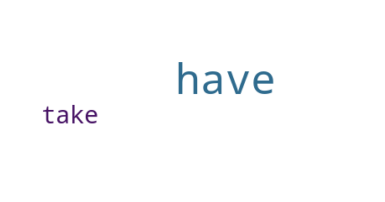

In [34]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
wordcloud.to_file("test.png")